In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils.utils import *
from utils.ml_utils import *
from pyod.models.lof import LOF

In [2]:
file_path = "Data/metrics_collector.tsv"

column_names = [
    'account_id', 'name', 'point', 'call_count', 'total_call_time', 
    'total_exclusive_time', 'min_call_time', 'max_call_time', 
    'sum_of_squares', 'instances', 'language', 'app_name', 
    'app_id', 'scope', 'host', 'display_host', 'pid', 
    'agent_version', 'labels'
]

data = pd.read_csv(file_path, sep='\t', header=None)

data.columns = column_names

data["point"] = pd.to_datetime(data["point"])


data = data.sort_values(by = "point")

data.head(10)

/var/folders/n9/qf3jg31d5rz3v4ydwp7__zfm0000gn/T/ipykernel_32630/1130808125.py:11: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t', header=None)


,account_id,name,point,call_count,total_call_time,total_exclusive_time,min_call_time,max_call_time,sum_of_squares,instances,language,app_name,app_id,scope,host,display_host,pid,agent_version,labels
0,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:32:00,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
1631994,1,Datastore/instance/Redis/redis/6379,2024-04-15 23:32:00,1004.5,0.007253,0.007253,5.340000e-07,0.004418,1.106032e-05,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
7791744,1,MemoryPool/Heap/G1 Old Gen/Max,2024-04-15 23:32:00,12.0,11736.000000,11736.000000,9.780000e+02,978.000000,1.147781e+07,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
16520436,1,Threads/Time/CPU/qtp#-#/SystemTime,2024-04-15 23:32:00,21.5,1.366000,1.366000,3.500000e-02,0.099000,9.165700e-02,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
16512917,1,Threads/TotalTime/New Relic Harvest Service/Cp...,2024-04-15 23:32:00,1.0,0.005500,0.005500,5.000000e-03,0.006000,3.050000e-05,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
7769289,1,MemoryPool/Heap/G1 Old Gen/Committed,2024-04-15 23:32:00,12.0,4148.500000,4148.500000,3.370000e+02,355.000000,1.434466e+06,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
16510173,1,Threads/TotalTime/qtp#-#/CpuTime,2024-04-15 23:32:00,21.5,10.916000,10.916000,3.980000e-01,0.693000,5.640867e+00,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
16491691,1,Threads/Time/CPU/Reference Handler/UserTime,2024-04-15 23:32:00,1.0,0.005000,0.005000,0.000000e+00,0.010000,5.000000e-05,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
7716215,1,MemoryPool/Heap/G1 Eden Space/Used,2024-04-15 23:32:00,12.0,3349.000000,3349.000000,6.300000e+01,482.000000,1.153586e+06,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}
16447534,1,Threads/Time/CPU/Reference Handler/SystemTime,2024-04-15 23:32:00,1.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.0,java,[GMonit] Collector,17592186045423,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{}


In [3]:
def make_table(data: pd.DataFrame) -> pd.DataFrame:

    web_response_table = web_response(data)
    throughput_table =  throughput(data)
    apdex_table = apdex(data)
    error_table = error(data)

    metrics_table = pd.DataFrame({
        "time": web_response_table["time"],
        "web_response": web_response_table["web_response"],
        "throughput": throughput_table["throughput"],
        "apdex": apdex_table["apdex"],
        "error": error_table["error"]
    })

    return metrics_table
    

In [4]:
metrics_table = make_table(data)

/Users/alexander/Учёба/ХАКАТОНЫ/RedLab/redlab_hack/utils/utils.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['time'] = filtered_data['point']
/Users/alexander/Учёба/ХАКАТОНЫ/RedLab/redlab_hack/utils/utils.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['web_response'] = filtered_data['total_call_time'].sum() / filtered_data['call_count'].sum()


In [5]:
metrics_table

,time,web_response,throughput,apdex,error
0,2024-04-15 23:32:00,0.015006,3898.0,0.999679,0.000128
1,2024-04-15 23:33:00,0.015006,3917.5,0.999745,0.000128
2,2024-04-15 23:34:00,0.015006,3993.0,0.999687,0.000000
3,2024-04-15 23:35:00,0.015006,3991.5,0.999812,0.000000
4,2024-04-15 23:36:00,0.015006,3915.5,0.999489,0.000000
...,...,...,...,...,...
43267,2024-05-16 00:54:00,0.015006,2560.0,0.998828,0.000000
43268,2024-05-16 00:55:00,0.015006,2491.0,0.998495,0.000000
43269,2024-05-16 00:56:00,0.015006,2429.0,0.997736,0.000206
43270,2024-05-16 00:57:00,0.015006,2373.5,0.997999,0.000211


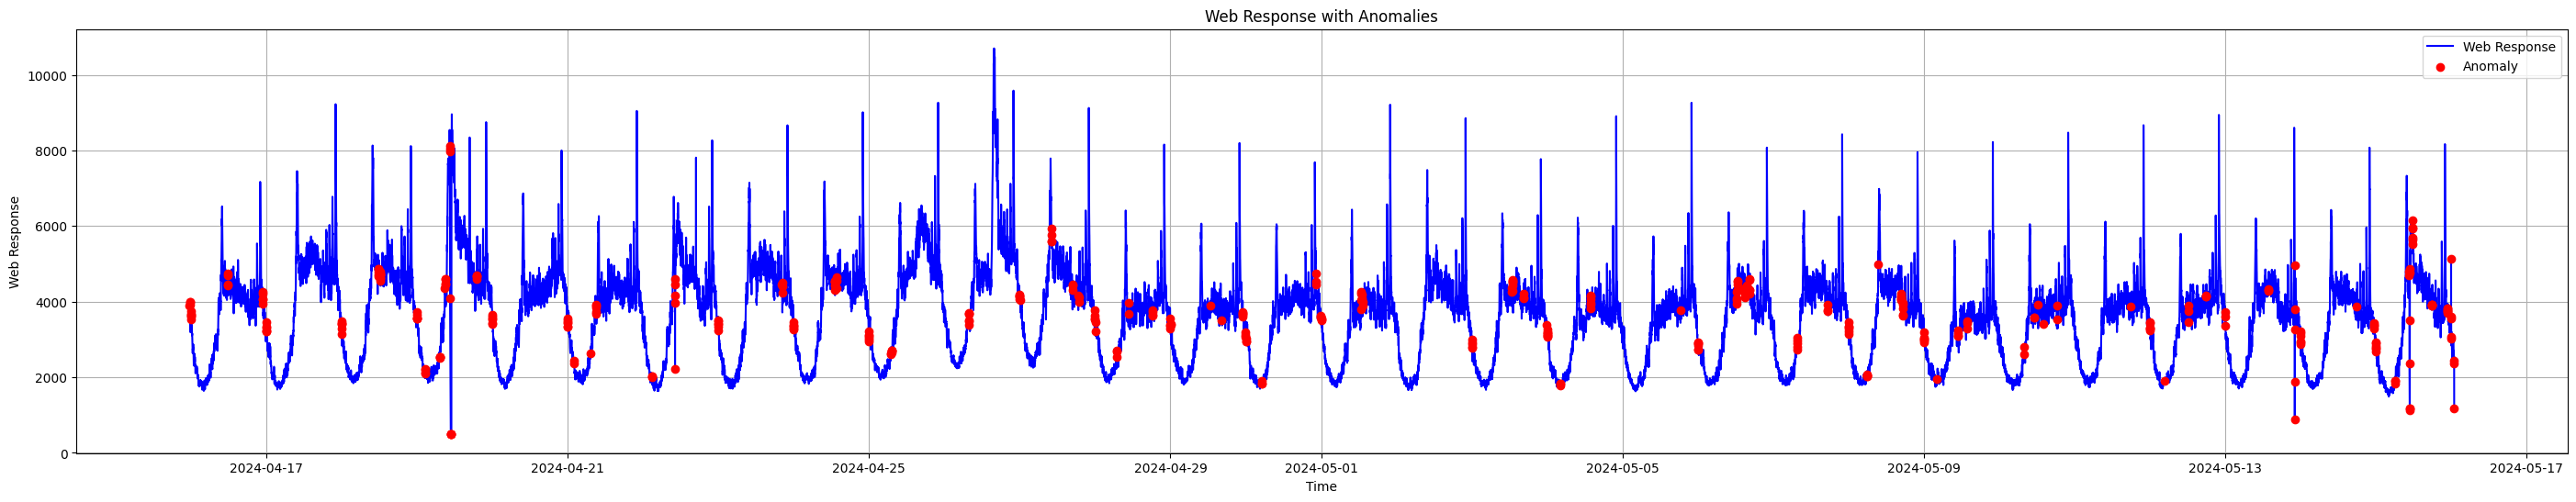

In [6]:
metrics_table['time_numeric'] = pd.to_datetime(metrics_table['time']).astype(int) / 10**9  # Преобразование в секунды

# Извлечение данных столбцов 'time_numeric' и 'web_response'
data = metrics_table[['time_numeric', 'apdex']].values

# Обучение модели IForest
clf = LOF(
    n_neighbors=5,
    contamination=0.0095,
    n_jobs=-1
)

clf.fit(data)

# Прогнозирование аномалий
labels = clf.labels_  # Метки аномалий (0: нормальный, 1: аномалия)
scores = clf.decision_scores_  # Оценки аномалий

# Добавление меток аномалий в DataFrame
metrics_table['anomaly'] = labels

# Преобразование временных меток обратно в datetime для графика
metrics_table['time'] = pd.to_datetime(metrics_table['time'])

# Построение линейного графика с пометкой аномалий
plt.figure(figsize=(35, 6))
plt.plot(metrics_table['time'], metrics_table['throughput'], color='blue', label='Web Response')
plt.scatter(metrics_table[metrics_table['anomaly'] == 1]['time'], metrics_table[metrics_table['anomaly'] == 1]['throughput'], color='red', label='Anomaly', zorder=5)
plt.title('Web Response with Anomalies')
plt.xlabel('Time')
plt.ylabel('Web Response')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    return p_value

# Функция для добавления разностей и сглаживания
def add_diff_and_smoothing(df, column):
    df[f'{column}_diff'] = df[column].diff().fillna(0)
    df[f'{column}_smoothing'] = df[column].rolling(window=5).mean().fillna(df[column])
    return df

# Преобразование временных меток в числовой формат для последующего анализа
metrics_table['time_numeric'] = pd.to_datetime(metrics_table['time']).astype(int) / 10**9  # Преобразование в секунды

# Применение проверки на стационарность и добавление новых признаков
for column in metrics_table.columns:
    if column not in ['time', 'time_numeric']:  # Исключаем временные метки
        p_value = check_stationarity(metrics_table[column])
        print(f'Признак: {column}, p-value: {p_value}')
        if p_value > 0.05:  # Если p-value > 0.05, данные не стационарны
            print(f'Признак {column} не является стационарным. Добавляем differencing и smoothing.')
            metrics_table = add_diff_and_smoothing(metrics_table, column)
        else:
            print(f'Признак {column} является стационарным.')

# Отображение первых нескольких строк обновленного DataFrame
print(metrics_table.head())

# Теперь можно использовать обновленный DataFrame для обучения модели
# Извлечение данных столбцов 'time_numeric' и других признаков
feature_columns = [col for col in metrics_table.columns if col not in ['time', 'time_numeric', 'anomaly']]
data = metrics_table[['time_numeric'] + feature_columns].values




Признак: web_response, p-value: 0.0
Признак web_response является стационарным.
Признак: throughput, p-value: 9.329759972099329e-08
Признак throughput является стационарным.
Признак: apdex, p-value: 0.0
Признак apdex является стационарным.
Признак: error, p-value: 0.0
Признак error является стационарным.
Признак: anomaly, p-value: 0.0
Признак anomaly является стационарным.
                 time  web_response  throughput     apdex     error  \
0 2024-04-15 23:32:00      0.015006      3898.0  0.999679  0.000128   
1 2024-04-15 23:33:00      0.015006      3917.5  0.999745  0.000128   
2 2024-04-15 23:34:00      0.015006      3993.0  0.999687  0.000000   
3 2024-04-15 23:35:00      0.015006      3991.5  0.999812  0.000000   
4 2024-04-15 23:36:00      0.015006      3915.5  0.999489  0.000000   

   time_numeric  anomaly  
0  1.713224e+09        1  
1  1.713224e+09        1  
2  1.713224e+09        1  
3  1.713224e+09        1  
4  1.713224e+09        0  


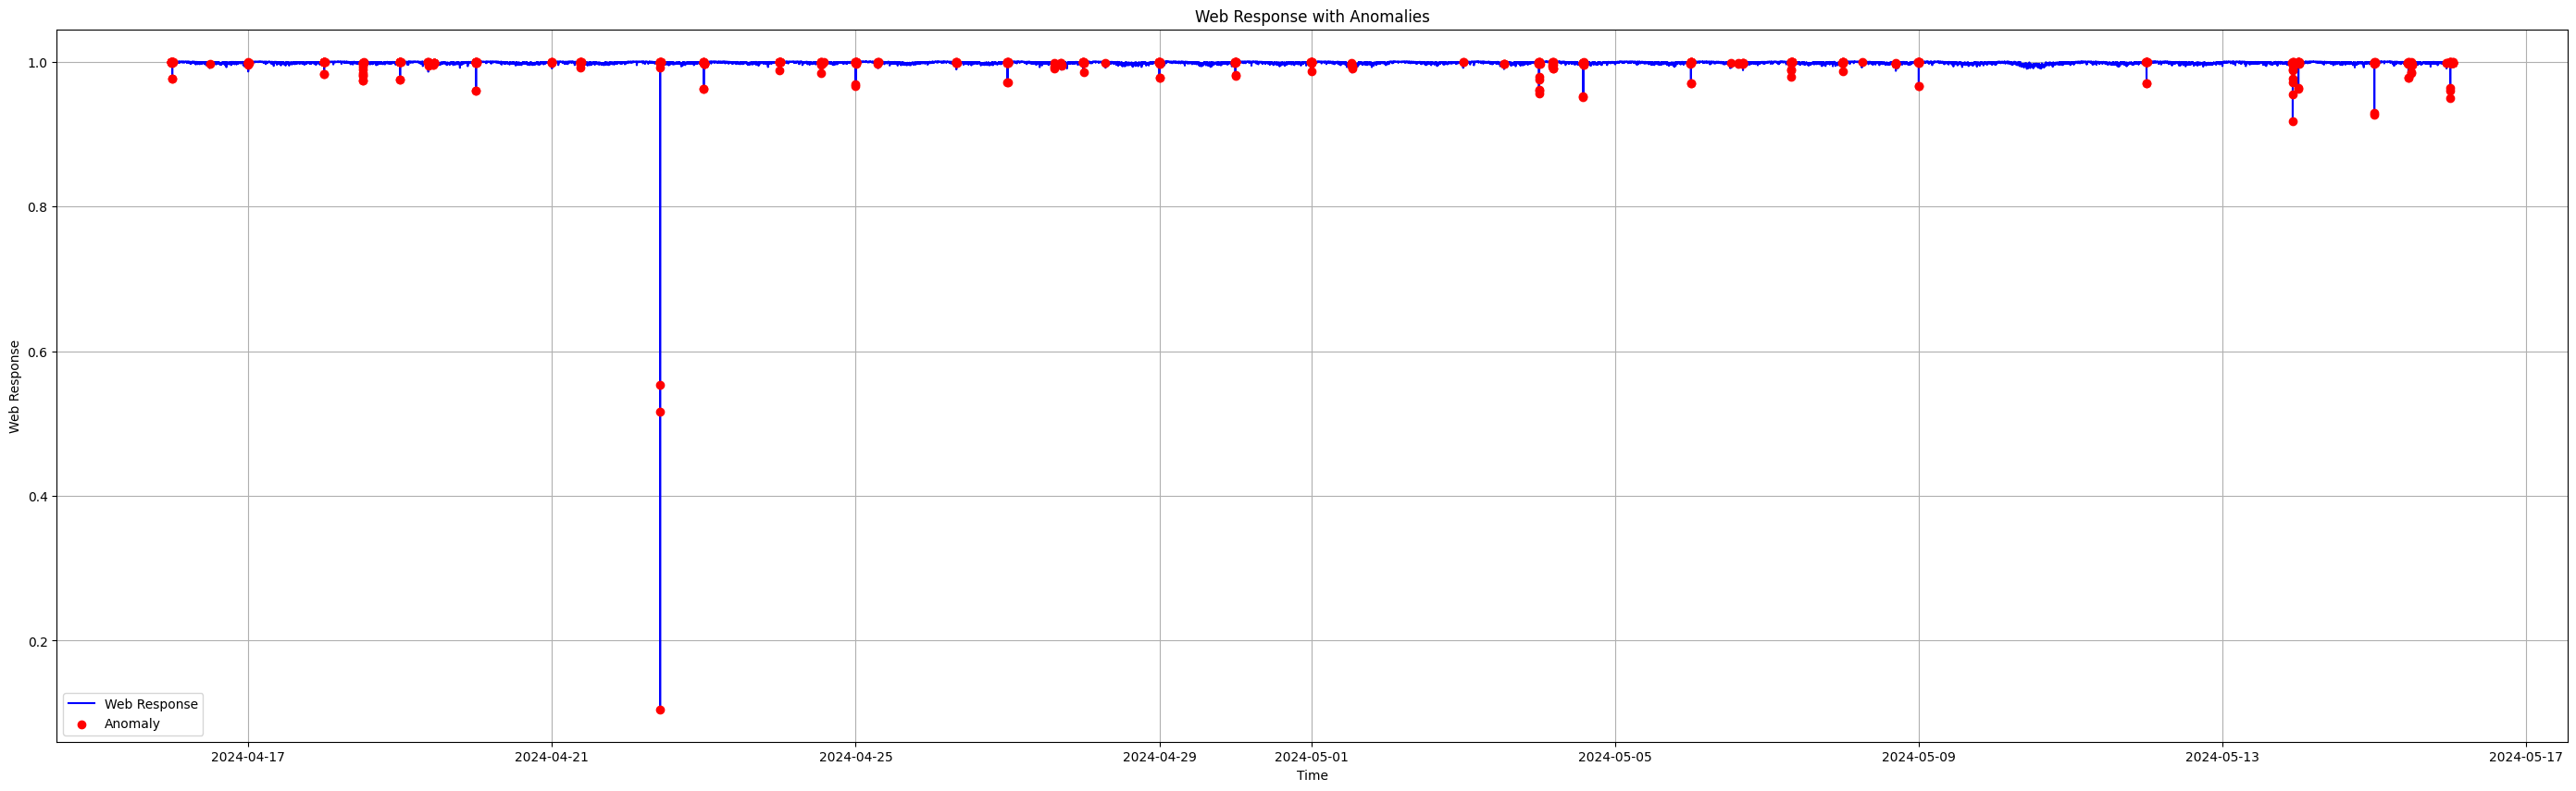

{'variance_diff': -95.36764784211968, 'fraction_anomaly': 0.011000184877056757}

In [12]:
clf = LOF(
    n_neighbors=10,
    contamination=0.011,
    n_jobs=-1
)

metrics_table['time_numeric'] = pd.to_datetime(metrics_table['time']).astype(int) / 10**9  # Преобразование в секунды

# Извлечение данных столбцов 'time_numeric' и 'web_response'
data = metrics_table[['time_numeric', 'apdex']].values
clf.fit(data)

# Прогнозирование аномалий
labels = clf.labels_  # Метки аномалий (0: нормальный, 1: аномалия)
scores = clf.decision_scores_  # Оценки аномалий

# Добавление меток аномалий в DataFrame
metrics_table['anomaly'] = labels

# Преобразование временных меток обратно в datetime для графика
metrics_table['time'] = pd.to_datetime(metrics_table['time'])

# Построение линейного графика с пометкой аномалий
plt.figure(figsize=(35, 10))
plt.plot(metrics_table['time'], metrics_table['apdex'], color='blue', label='Web Response')
plt.scatter(metrics_table[metrics_table['anomaly'] == 1]['time'], metrics_table[metrics_table['anomaly'] == 1]['apdex'], color='red', label='Anomaly', zorder=5)
plt.title('Web Response with Anomalies')
plt.xlabel('Time')
plt.ylabel('Web Response')
plt.legend()
plt.grid(True)
plt.show()

data = pd.DataFrame(data, columns=['time_numeric', 'apdex'])
metrics_name = "apdex"
metrics(data, labels, metrics_name)

In [10]:
def metrics(df: pd.DataFrame, mask: np.array, metrics_name: str) -> dict:

    normalized_metric = (df[metrics_name] - np.mean(df[metrics_name])) / np.std(df[metrics_name])
    original_variance = np.var(normalized_metric)
    filtered_metric = normalized_metric[mask == 0]
    filtered_variance = np.var(filtered_metric)

    variance_difference = filtered_variance / original_variance * 100 - 100
    fraction_anomaly = len(mask[mask == 1]) / len(mask)

    metric = {
        "variance_diff": variance_difference,
        "fraction_anomaly": fraction_anomaly
    }

    return metric

metrics(data, labels, metrics_name)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [11]:
data

array([[1.71322392e+09, 9.99679323e-01],
       [1.71322398e+09, 9.99744735e-01],
       [1.71322404e+09, 9.99686952e-01],
       ...,
       [1.71582096e+09, 9.97735694e-01],
       [1.71582102e+09, 9.97998736e-01],
       [1.71582108e+09, 9.99145299e-01]])